### Installing required Packages

In [1]:
from scipy.io import arff

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import scipy, scipy.stats
#import statsmodels.formula.api as sm
from sklearn import linear_model
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff('3year.arff')
df = pd.DataFrame(data[0])

df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0'
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0'


In [4]:
data2 = arff.loadarff('2year.arff')
df2 = pd.DataFrame(data2[0])

data3 = arff.loadarff('3year.arff')
df = pd.DataFrame(data3[0])

data4 = arff.loadarff('4year.arff')
df4 = pd.DataFrame(data4[0])

data5 = arff.loadarff('5year.arff')
df5 = pd.DataFrame(data5[0])

In [41]:
final = df.append([df2,df3,df4,df5])

In [42]:
final.shape

(43405, 65)

In [82]:
df.to_csv('df.csv')

In [1]:
import matplotlib
import missingno as msno
%matplotlib inline

In [ ]:
#df.rename(columns={'Attr1': 'newName1', 'oldName2': 'newName2'}, inplace=True)

In [5]:
train = df.iloc[:,:64]
train_labels = df.iloc[:,np.r_[64]]

In [6]:
missingdata_df = df.isnull().any()

In [7]:
columns_missing  =  list(missingdata_df)
columns_missing

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False]

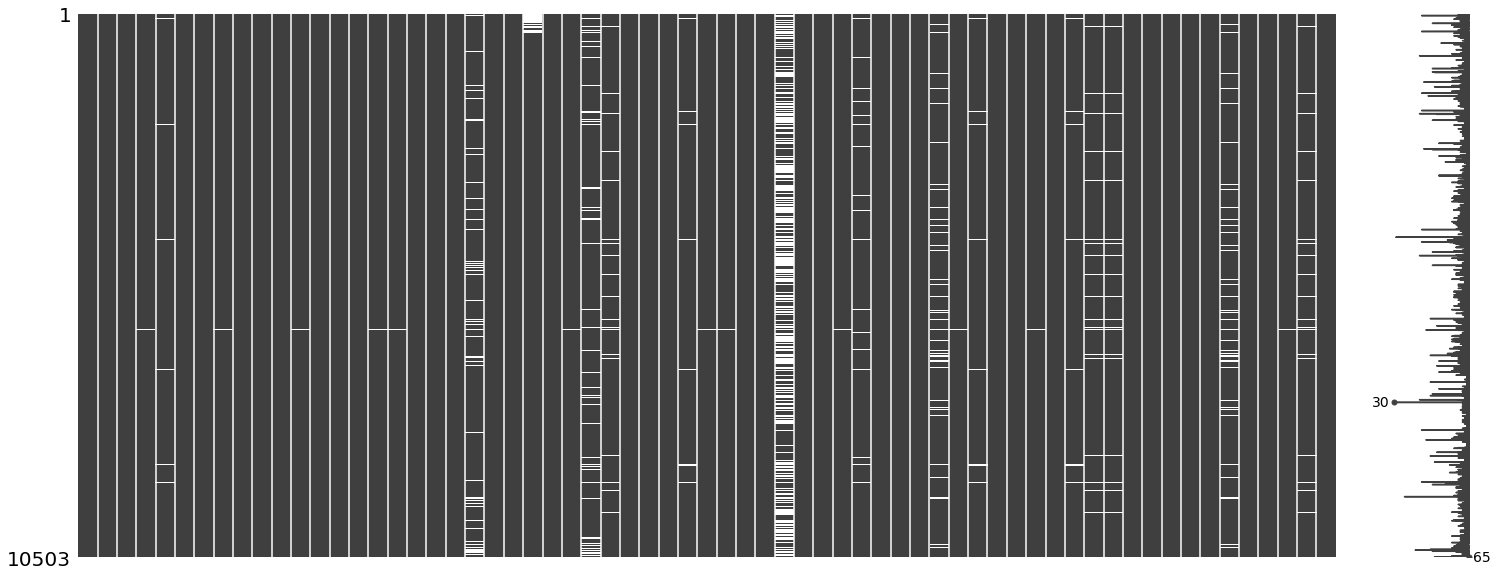

In [6]:
msno.matrix(df)

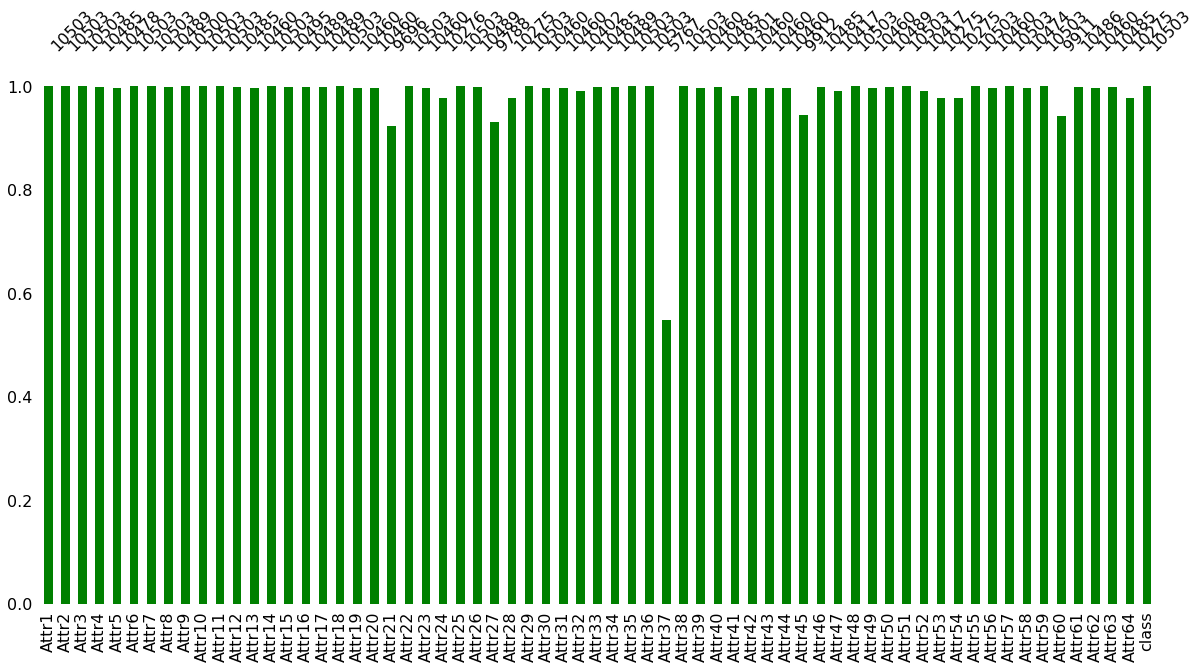

In [7]:
msno.bar(df,color = "green",figsize = (20,10))

# only Attr 3,6,7,8,9

In [134]:
df_sub = df.iloc[:,np.r_[2,5:9]]

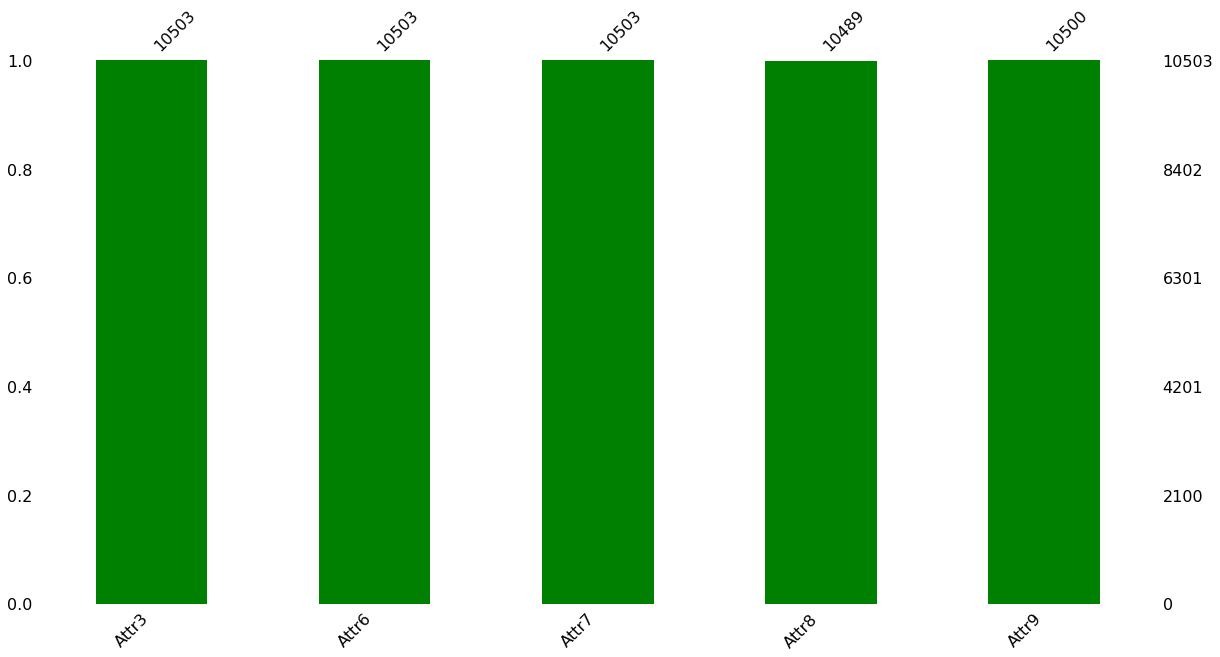

In [135]:
msno.bar(df_sub,color = "green",figsize = (20,10))

In [7]:
##one column dropped
df_new = df.iloc[:,np.r_[0:36,37:65]]

In [8]:
df_new

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.174190,0.412990,0.143710,1.34800,-28.98200,0.603830,0.219460,1.122500,1.19610,0.463590,...,0.163960,0.375740,0.83604,0.000007,9.71450,6.28130,84.2910,4.33030,4.03410,b'0'
1,0.146240,0.460380,0.282300,1.62940,2.59520,0.000000,0.171850,1.172100,1.60180,0.539620,...,0.027516,0.271000,0.90108,0.000000,5.98820,4.11030,102.1900,3.57160,5.95000,b'0'
2,0.000595,0.226120,0.488390,3.15990,84.87400,0.191140,0.004572,2.988100,1.00770,0.675660,...,0.007639,0.000881,0.99236,0.000000,6.77420,3.79220,64.8460,5.62870,4.45810,b'0'
3,0.024526,0.432360,0.275460,1.78330,-10.10500,0.569440,0.024526,1.305700,1.05090,0.564530,...,0.048398,0.043445,0.95160,0.142980,4.22860,5.05280,98.7830,3.69500,3.48440,b'0'
4,0.188290,0.415040,0.342310,1.92790,-58.27400,0.000000,0.233580,1.409400,1.33930,0.584960,...,0.176480,0.321880,0.82635,0.073039,2.59120,7.07560,100.5400,3.63030,4.63750,b'0'
5,0.182060,0.556150,0.321910,1.60450,16.31400,0.000000,0.182060,0.798080,1.81260,0.443850,...,0.555770,0.410190,0.46957,0.029421,8.45530,3.34880,107.2400,3.40360,12.45400,b'0'
6,0.115030,0.036659,0.923450,112.63000,55.58000,0.000000,0.142150,26.279000,0.44339,0.963340,...,0.067038,0.119400,0.75777,0.015995,18.43300,41.78300,6.8102,53.59600,6.49420,b'0'
7,0.009832,0.670660,0.135460,1.23930,-107.73000,-0.001401,0.013422,0.491080,1.18250,0.329340,...,0.197800,0.029854,0.83478,0.143940,8.18130,4.00840,174.7300,2.08890,3.96160,b'0'
8,0.238950,0.554730,0.406970,1.76090,-22.90700,0.000000,0.297140,0.802680,2.33170,0.445270,...,0.140380,0.536630,0.87292,0.044584,4.45270,7.18470,83.7270,4.35940,40.09700,b'0'
9,-0.119860,0.607330,0.041368,1.06880,-37.59500,-0.447970,-0.119860,0.646550,3.00000,0.392670,...,0.264280,-0.305250,0.73749,0.000000,12.84400,8.30430,73.1720,4.98830,8.39840,b'0'


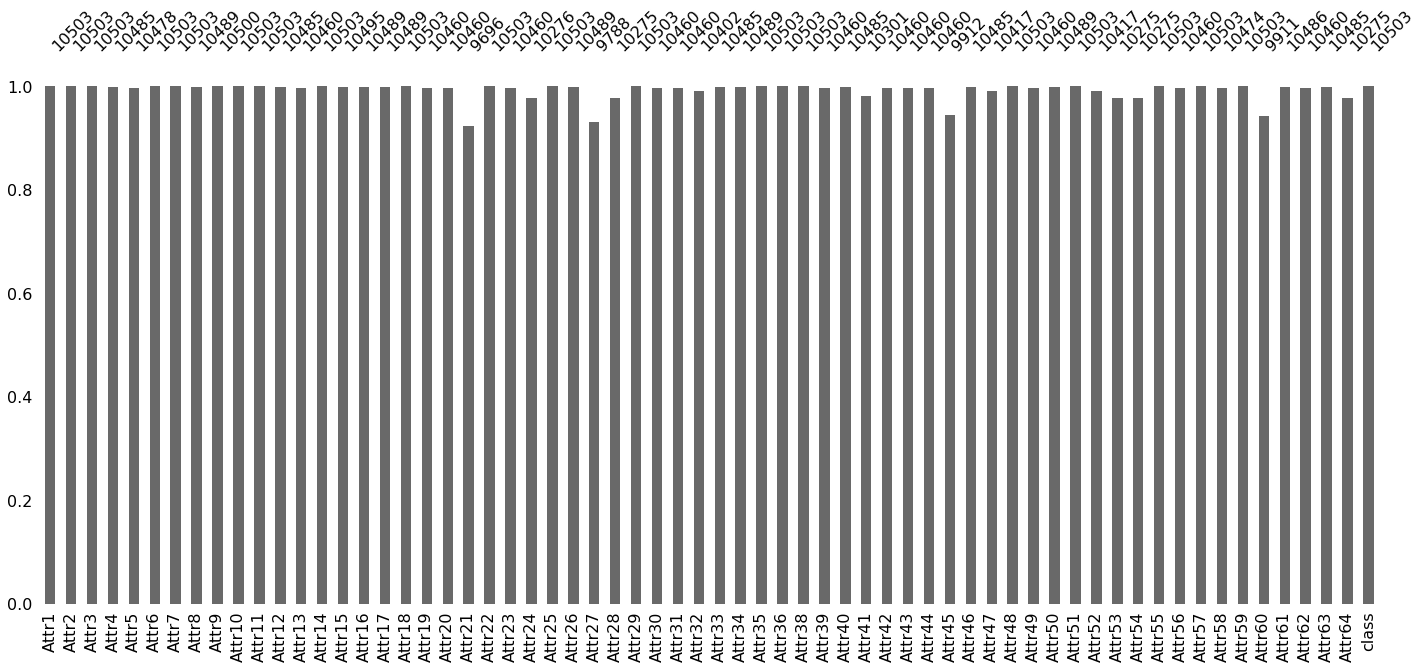

In [9]:
msno.bar(df_new) ##21,24,27,28,60,64,53,54,41

In [54]:
df.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,7024.000000,7024.000000,7024.000000,6997.000000,7.019000e+03,7024.000000,7024.000000,7002.000000,7026.000000,7024.000000,...,7.027000e+03,7.027000e+03,7026.000000,7.027000e+03,7026.000000,6.892000e+03,7005.000000,7.027000e+03,6997.000000,6993.000000
mean,0.034660,0.560215,0.119969,2.629143,-2.631672e+02,0.059712,0.313876,2.623996,5.552855,1.825832,...,8.855693e+03,-1.577367e+02,0.193243,1.587409e+02,0.277829,4.328830e+02,15.642228,4.763202e+03,8.126852,208.731950
std,4.565504,5.350084,5.275459,13.257356,3.707460e+04,6.051113,8.353274,18.708327,101.995448,33.836452,...,7.247527e+04,1.322125e+04,4.344046,1.322124e+04,6.339149,2.612802e+04,261.554534,3.107835e+05,19.996419,5140.708804
min,-256.890000,-72.162000,-440.500000,0.000000,-2.722100e+06,-397.890000,-189.560000,-141.410000,0.000005,-440.550000,...,-8.004700e+05,-1.108300e+06,-315.370000,-4.194000e-03,-327.970000,4.700000e-05,0.000016,0.000000e+00,0.000015,0.000010
25%,0.021182,0.296678,0.026968,1.063100,-4.449800e+01,0.000000,0.028023,0.445710,1.037225,0.300785,...,9.712000e+01,2.031450e-02,0.056772,8.647650e-01,0.000000,5.923950e+00,4.829000,4.322250e+01,3.425400,2.538600
50%,0.075802,0.482960,0.181275,1.502000,-5.373900e+00,0.000000,0.090109,1.015100,1.205750,0.492235,...,1.604800e+03,6.338200e-02,0.175745,9.388100e-01,0.028438,1.004050e+01,7.033700,6.850900e+01,5.303200,4.637700
75%,0.160268,0.680233,0.362548,2.460700,3.777050e+01,0.146660,0.188667,2.267675,2.132975,0.675677,...,5.955900e+03,1.376950e-01,0.351922,9.820150e-01,0.273867,2.013900e+01,10.703000,1.063350e+02,8.357900,9.782200
max,94.280000,441.500000,1.000000,1017.800000,9.909000e+05,303.670000,453.770000,1452.200000,3876.100000,1099.500000,...,4.398400e+06,1.000000e+00,126.670000,1.108300e+06,119.580000,2.137800e+06,21110.000000,2.501600e+07,1042.200000,294770.000000


In [14]:
df_new.columns

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr22', 'Attr23',
       'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29', 'Attr30',
       'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36', 'Attr38',
       'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43', 'Attr44', 'Attr45',
       'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50', 'Attr51', 'Attr52',
       'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57', 'Attr58', 'Attr59',
       'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64', 'class'],
      dtype='object')

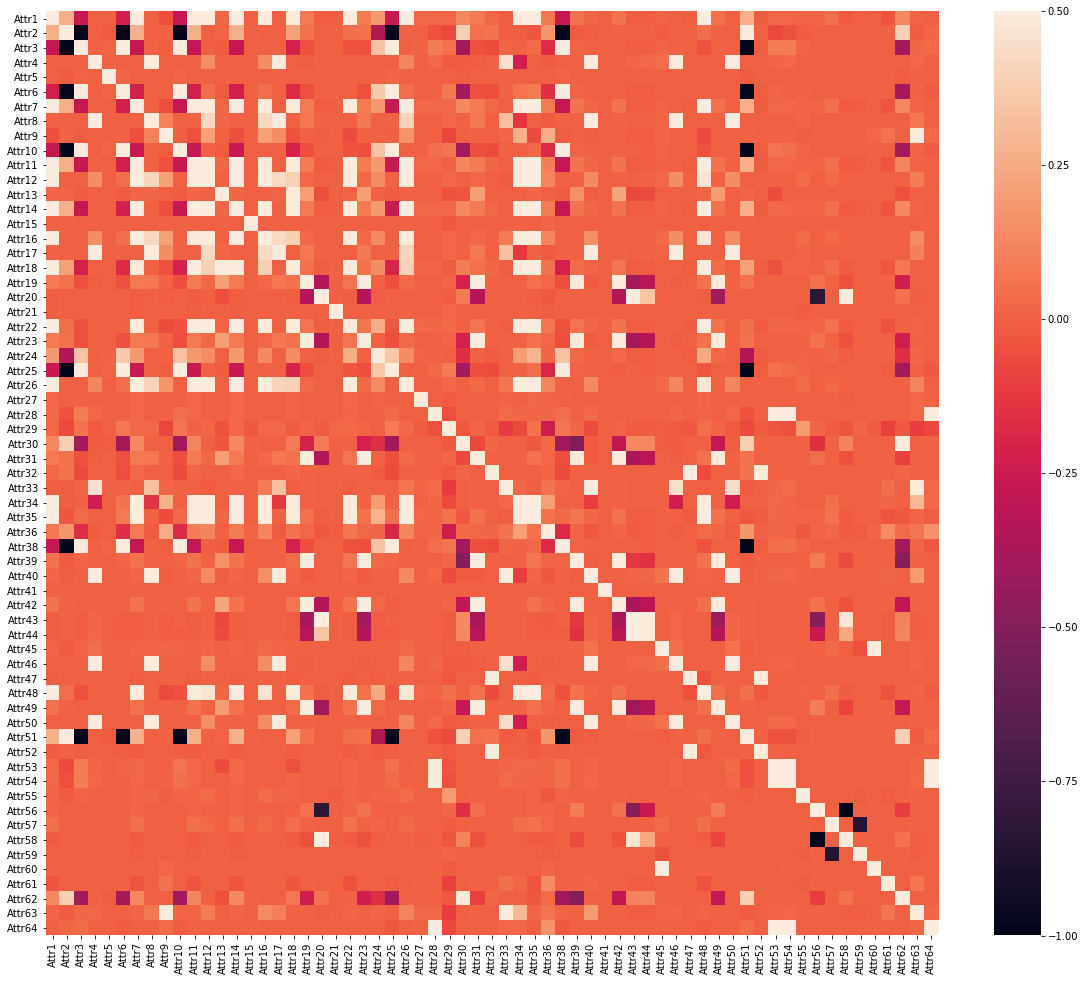

In [11]:
corrmat = df_new.corr()
f, ax = plt.subplots(figsize=(20, 17))
sns.heatmap(corrmat, vmax=.5);

In [100]:
df_new.shape

(7027, 63)

In [ ]:
Data PreProcessing

### Skewness before feature scaling

### Feature scaling using log(x+1)

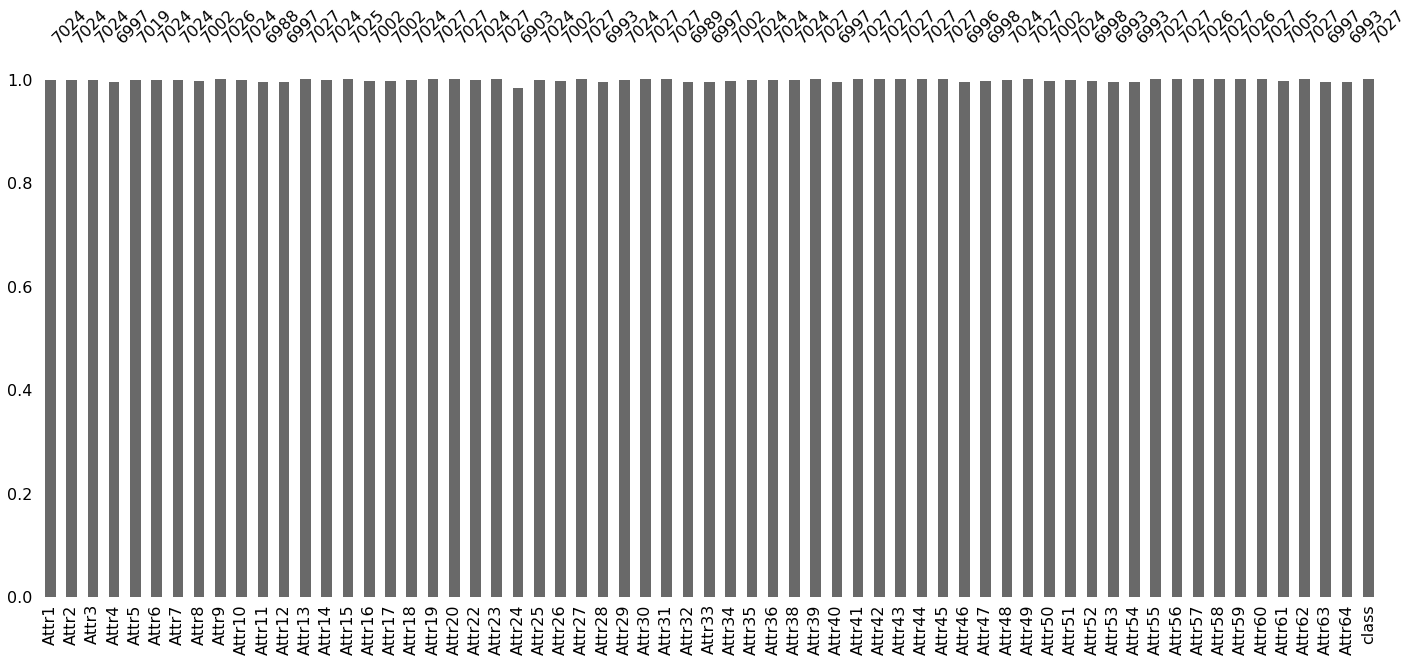

In [25]:
msno.bar(df_new)

### clean data - remove missing terms or impute them  ###27,45,60,24,41


In [10]:
#Treating Missing Values using scikit learn imputation Median imputation for four variables
#21,24,27,28,60,64,53,54,41
#Treating Missing Values
df_new['Attr21'].fillna(df_new['Attr21'].median(), inplace=True)#Treating Missing Values
df_new['Attr28'].fillna(df_new['Attr28'].median(), inplace=True)#Treating Missing Values
df_new['Attr60'].fillna(df_new['Attr60'].median(), inplace=True)#Treating Missing Values
df_new['Attr64'].fillna(df_new['Attr64'].median(), inplace=True)#Treating Missing Values
df_new['Attr27'].fillna(df_new['Attr27'].median(), inplace=True)
#Treating Missing Values
df_new['Attr24'].fillna(df_new['Attr24'].median(), inplace=True)
#Treating Missing Values
df_new['Attr41'].fillna(df_new['Attr41'].median(), inplace=True)
#Treating Missing Values
df_new['Attr53'].fillna(df_new['Attr53'].median(), inplace=True)
df_new['Attr54'].fillna(df_new['Attr54'].median(), inplace=True)

In [17]:
df_new.shape

(10503, 64)

In [ ]:
##removing rows which have atleast one missing value

In [50]:
dfy1 = df_new.dropna(axis =0)

In [51]:
dfy1.shape

(9799, 64)

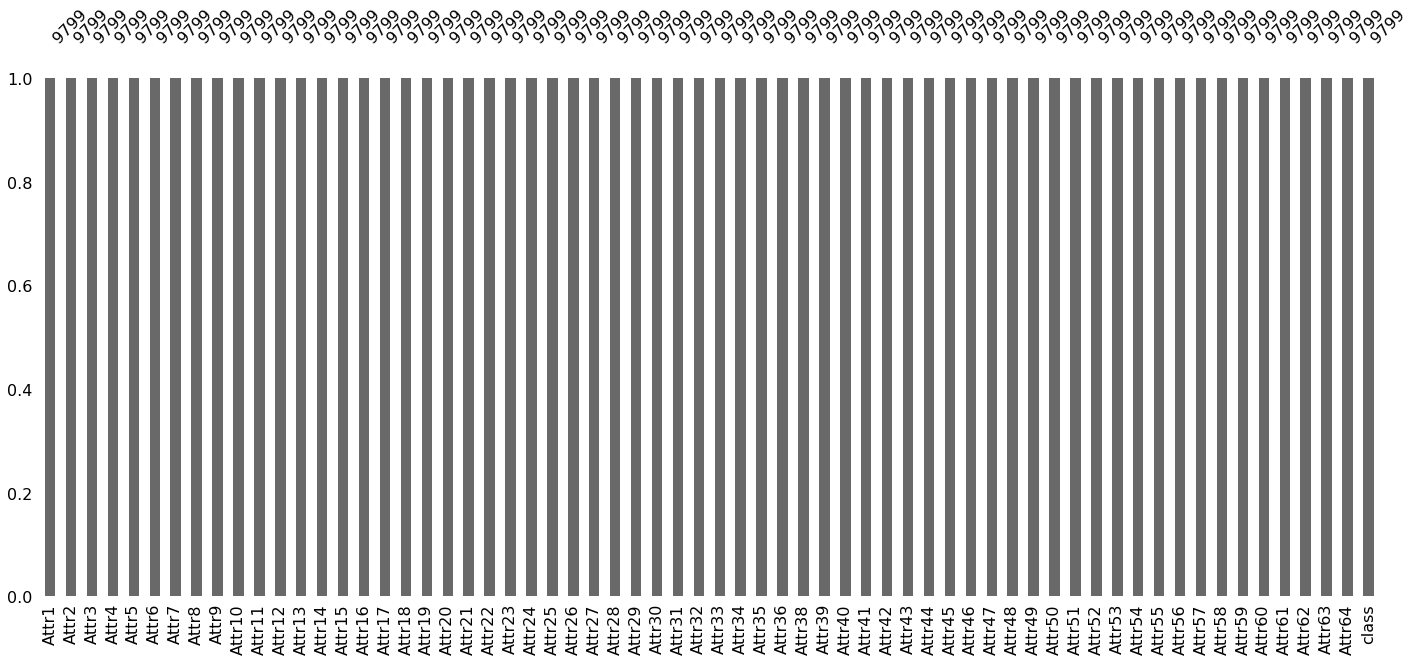

In [30]:
msno.bar(dfy1) #

In [41]:
dfy1.shape  ###704 rows deleted

(9799, 64)

In [13]:
for i in dfy1.skew().keys():        
        dfy1[i] = dfy1[i]
        print("Just finished {} with skew {}".format(str(i), str(dfy1.skew()[i])))

Just finished Attr1 with skew 5.32582399384211
Just finished Attr2 with skew 17.57476337655084
Just finished Attr3 with skew -17.439849303525452
Just finished Attr4 with skew 35.943161805238546
Just finished Attr5 with skew -93.73497313300582
Just finished Attr6 with skew -43.03120885730525
Just finished Attr7 with skew 4.7641146130746295
Just finished Attr8 with skew 69.82209406022221
Just finished Attr9 with skew 3.5041024058647827
Just finished Attr10 with skew -15.318516442500941
Just finished Attr11 with skew 4.982390792311083
Just finished Attr12 with skew 45.567135848469114
Just finished Attr13 with skew 98.89146734291599
Just finished Attr14 with skew 4.764094269983953
Just finished Attr15 with skew 75.71301099944577
Just finished Attr16 with skew 50.7772529762574
Just finished Attr17 with skew 69.82113283115707
Just finished Attr18 with skew 74.50784372578272
Just finished Attr19 with skew 11.130380253878082
Just finished Attr20 with skew 88.4988877857368
Just finished Attr21 

In [52]:
for i in dfy1.skew().keys():        
        dfy1[i] = np.log1p(dfy1[i])
        print("Just finished {} with skew {}".format(str(i), str(dfy1.skew()[i])))

Just finished Attr1 with skew -4.865391544324498
Just finished Attr2 with skew 1.5740662089231443
Just finished Attr3 with skew -3.4455870716665085
Just finished Attr4 with skew 2.051007202895825
Just finished Attr5 with skew 0.27986555058986007
Just finished Attr6 with skew -4.2569866209535165
Just finished Attr7 with skew -4.2045971700135985
Just finished Attr8 with skew 1.3519927384393118
Just finished Attr9 with skew 1.155907623678035
Just finished Attr10 with skew -4.237373603712102
Just finished Attr11 with skew -4.595666022019705
Just finished Attr12 with skew 0.25299207644375593
Just finished Attr13 with skew 6.015211258877761
Just finished Attr14 with skew -4.204821629223752
Just finished Attr15 with skew 0.2683498779234359
Just finished Attr16 with skew 0.6302228844771148
Just finished Attr17 with skew 2.2918397495524254
Just finished Attr18 with skew -3.3906485311189734
Just finished Attr19 with skew -4.309897122110709
Just finished Attr20 with skew -0.5111540866282392
Just 

AttributeError: 'bytes' object has no attribute 'log1p'

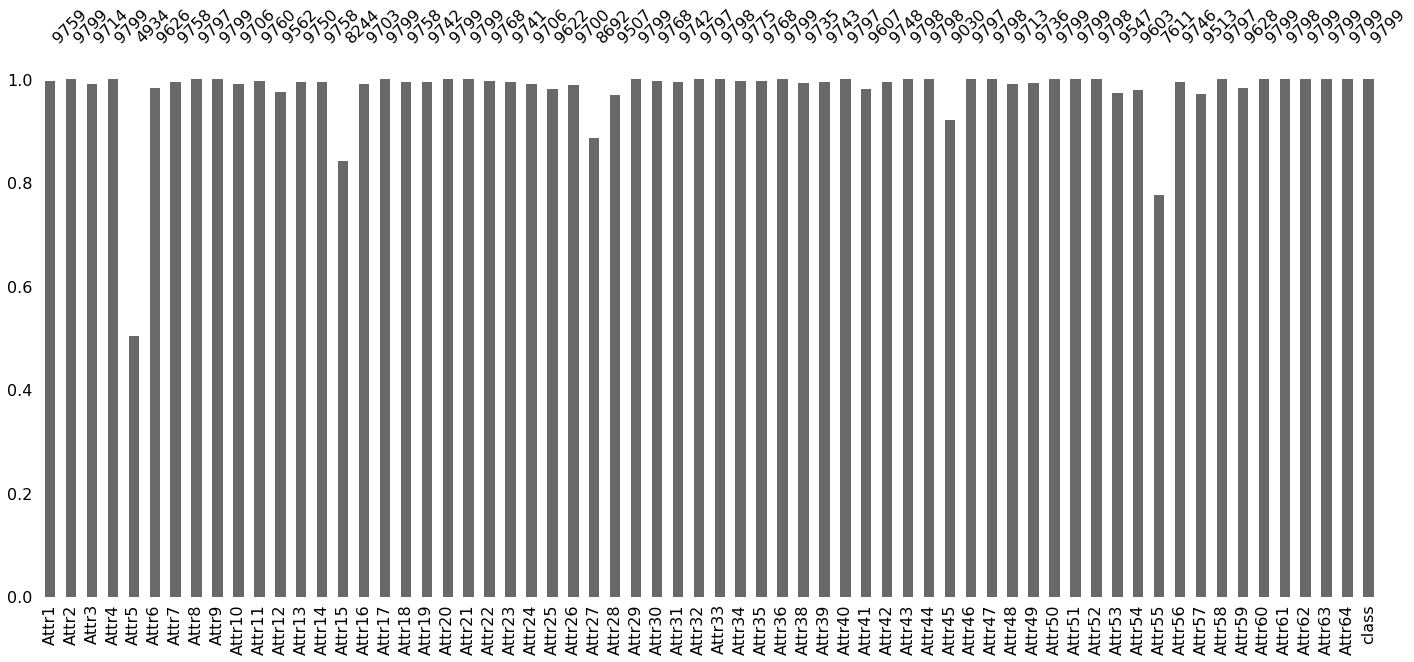

In [32]:
msno.bar(dfy1) #

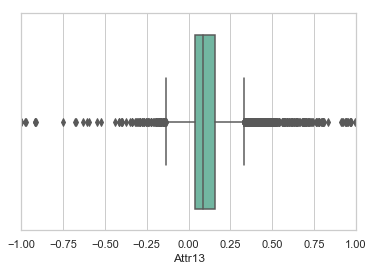

In [55]:
import seaborn as sns
plt.xlim([-1,1])
sns.set(style="whitegrid")
sns.boxplot(x=dfy1['Attr13'],palette="Set2")
#sns.swarmplot(x=df_new['Attr13'], color=".25")

In [58]:
X_new.shape

(8575, 24)

In [63]:
X_new['class'].value_counts()

b'0'    8244
b'1'     331
Name: class, dtype: int64

In [57]:
X_new.tail()

,Attr2,Attr6,Attr7,Attr8,Attr10,Attr13,Attr21,Attr25,Attr26,Attr28,...,Attr41,Attr42,Attr45,Attr48,Attr49,Attr56,Attr60,Attr62,Attr63,class
10498,0.457849,0.002857,0.002857,0.481531,0.306874,0.018211,0.685055,0.306874,0.119355,-0.348508,...,0.178498,0.006704,0.026881,-0.044793,-0.010997,0.011765,3.667196,3.765887,2.266844,b'1'
10499,0.439892,-0.053367,-0.034965,0.512722,0.314891,0.020712,0.546571,0.314891,0.020998,0.184311,...,0.643778,-0.031597,-0.770871,-0.113482,-0.079638,-0.057668,2.740388,3.519306,2.496588,b'1'
10500,0.609516,-0.247334,-0.141402,0.174902,0.148816,-0.127697,0.670408,-0.322729,-0.176582,-0.667265,...,-0.338891,-0.092677,-1.492188,-0.102429,-0.092677,0.134636,1.984265,5.362371,1.000558,b'1'
10501,0.405652,0.009378,0.007671,0.688084,0.402280,0.014366,0.560221,0.402280,0.055630,0.741413,...,0.326710,0.012495,0.029802,0.004165,0.002243,0.012112,1.941256,4.597541,1.550834,b'1'
10502,0.666701,0.000000,0.002562,0.053656,0.050926,0.011234,0.811552,0.014848,0.020558,0.021207,...,0.361332,0.023755,-0.006321,0.029233,0.013852,0.023220,2.146072,4.956953,1.276954,b'1'


In [67]:

X_new.to_csv('X_new.csv')


In [64]:
df_0 =X_new.iloc[:8245,63:]
df_0['new_class'] = '0'

In [68]:
df_1 = X_new.iloc[8245:,63:]
df_1['new_class'] = '1'

In [69]:
df_1

,new_class
10010,1
10012,1
10014,1
10015,1
10016,1
10017,1
10018,1
10020,1
10022,1
10025,1


In [74]:
y = df_0.append([df_1])

In [75]:
y.shape

(8575, 1)

In [76]:
df_0.shape

(8245, 1)

In [77]:
y.tail()

,new_class
10498,1
10499,1
10500,1
10501,1
10502,1


In [78]:
X_new = X_new.iloc[:,0:23]

In [53]:
X_new = dfy1.iloc[:,np.r_[1,5:8,9,12,20,24,25,27:30,36,32,39,40,43,46,47,54,58,60,61,63]]


In [79]:
X_new.shape

(8575, 23)

In [55]:
X_new = X_new.dropna(axis =0)

In [56]:
X_new.shape

(8575, 24)

In [80]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({'new_class': 1})


In [81]:
smote = SMOTE(sampling_strategy='minority', n_jobs=1)
X_res_new, y_res_new = smote.fit_resample(X_new, y)
print('Resampled dataset shape %s' % Counter(y_res_new))

Resampled dataset shape Counter({'0': 8245, '1': 8245})


In [82]:
scaler = StandardScaler()
X_res_new = scaler.fit_transform(X_res_new)
#y = scaler.fit_transform(y)

import numpy as np
from sklearn.model_selection import train_test_split

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_res_new, y_res_new, test_size=0.30, random_state=42)

In [244]:

from keras import Sequential
from keras.layers import Dense
from keras.layers import Dense, Dropout


classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(56, activation='relu', kernel_initializer='random_normal', input_dim=28))
classifier.add(Dropout(rate=0.2))
#Second  Hidden Layer
classifier.add(Dense(56, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(rate=0.2))
#third hidden layer
classifier.add(Dense(56, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))





In [245]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [247]:
y_pred_new = classifier.predict(X_test_new)


y__test_new = y_test_new.astype(int)


y__pred_new = (y_pred_new>0.6)
ypred_new = y__pred_new.astype(int)

In [246]:
history = classifier.fit(X_res_new, y_res_new, validation_split=0.25, epochs=50, batch_size=10)

Train on 14022 samples, validate on 4674 samples
Epoch 1/50
14022/14022 [==============================] - 8s 589us/step - loss: 0.5378 - acc: 0.7115 - val_loss: 0.8593 - val_acc: 0.5128
Epoch 2/50
14022/14022 [==============================] - 7s 530us/step - loss: 0.4902 - acc: 0.7510 - val_loss: 0.7016 - val_acc: 0.7018
Epoch 3/50
14022/14022 [==============================] - 6s 425us/step - loss: 0.4727 - acc: 0.7597 - val_loss: 0.7304 - val_acc: 0.6307
Epoch 4/50
14022/14022 [==============================] - 6s 438us/step - loss: 0.4559 - acc: 0.7718 - val_loss: 0.6240 - val_acc: 0.6878
Epoch 5/50
14022/14022 [==============================] - 6s 446us/step - loss: 0.4415 - acc: 0.7768 - val_loss: 0.6743 - val_acc: 0.6949
Epoch 6/50
14022/14022 [==============================] - 6s 449us/step - loss: 0.4268 - acc: 0.7938 - val_loss: 0.6577 - val_acc: 0.6898
Epoch 7/50
14022/14022 [==============================] - 6s 453us/step - loss: 0.4175 - acc: 0.7914 - val_loss: 0.5884 - v

from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y__test_new, ypred_new)
print(cm2)

In [249]:
accuracy = (cm2[0][0]+cm2[1][1])/(cm2[0][0]+cm2[0][1]+cm2[1][0]+cm2[1][1])
print("Accuracy is: "+ str(accuracy*100)+"%")

Accuracy is: 86.77126047423783%


In [250]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


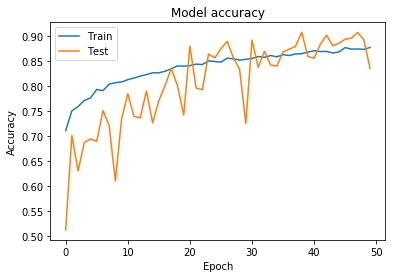

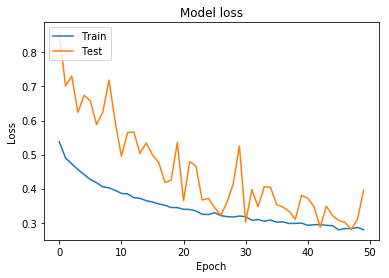

In [251]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [252]:
from sklearn.metrics import classification_report

In [256]:
print(classification_report(y__test_new, ypred_new))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      2783
           1       0.95      0.78      0.86      2826

   micro avg       0.87      0.87      0.87      5609
   macro avg       0.88      0.87      0.87      5609
weighted avg       0.88      0.87      0.87      5609



In [259]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y__test_new, ypred_new)

In [260]:
metrics.auc(fpr,tpr)

0.8683855243861286

In [ ]:
##class imbalance
##concatenate data and do seperately also
##classification models
##ANN
##xgboost
##missing data handling

In [78]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({'new_class': 1})


In [79]:
smote = SMOTE(sampling_strategy='minority', n_jobs=1)
X_res, y_res = smote.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'0': 9348, '1': 9348})


In [80]:
y_res

array(['0', '0', '0', ..., '1', '1', '1'], dtype=object)

In [173]:
from imblearn.over_sampling import ADASYN # doctest: +NORMALIZE_WHITESPACE
ada = ADASYN(sampling_strategy='auto',n_neighbors=5,random_state=42)
X_res1, y_res1 = ada.fit_resample(X, y)

Resampled dataset shape Counter({'new_class': 1})


In [172]:
print('Resampled dataset shape %s' % Counter(y_res1))

Resampled dataset shape Counter({'1': 6690, '0': 6658})


In [174]:
###Creating the dataset again
##random sampling
##leaving out 10% for validation


array(['0', '0', '0', ..., '1', '1', '1'], dtype=object)

In [81]:
scaler = StandardScaler()
X_res = scaler.fit_transform(X_res)
#y = scaler.fit_transform(y)

In [82]:
import numpy as np
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=42)

# ANN using keras 

In [86]:
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dense, Dropout

In [87]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(31, activation='relu', kernel_initializer='random_normal', input_dim=63))
classifier.add(Dropout(rate=0.2))
#Second  Hidden Layer
classifier.add(Dense(15, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(rate=0.2))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [88]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [89]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=10, epochs=50)

Epoch 1/50
13087/13087 [==============================] - 6s 463us/step - loss: 0.5927 - acc: 0.7042
Epoch 2/50
13087/13087 [==============================] - 4s 342us/step - loss: 0.5385 - acc: 0.7381
Epoch 3/50
13087/13087 [==============================] - 5s 383us/step - loss: 0.5084 - acc: 0.7554
Epoch 4/50
13087/13087 [==============================] - 4s 305us/step - loss: 0.4877 - acc: 0.7698
Epoch 5/50
13087/13087 [==============================] - 3s 261us/step - loss: 0.4683 - acc: 0.7802
Epoch 6/50
13087/13087 [==============================] - 3s 246us/step - loss: 0.4529 - acc: 0.7902
Epoch 7/50
13087/13087 [==============================] - 4s 313us/step - loss: 0.4407 - acc: 0.7962
Epoch 8/50
13087/13087 [==============================] - 4s 279us/step - loss: 0.4249 - acc: 0.8043
Epoch 9/50
13087/13087 [==============================] - 4s 314us/step - loss: 0.4125 - acc: 0.8118
Epoch 10/50
13087/13087 [==============================] - 4s 292us/step - loss: 0.3986 - a

(-1, 1)

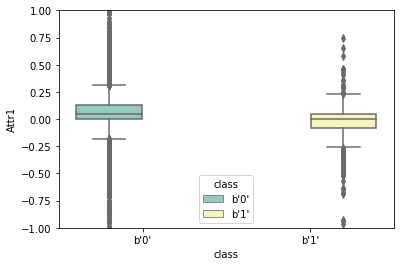

In [96]:
ax = sns.boxplot(x="class", y="Attr1", hue="class",data=df_new, palette="Set3")
plt.ylim([-1,1])

(-1, 1)

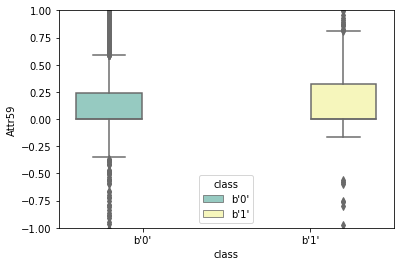

In [112]:
ax = sns.boxplot(x="class", y="Attr59", hue="class",data=df_new, palette="Set3")
plt.ylim([-1,1])

(-1, 1)

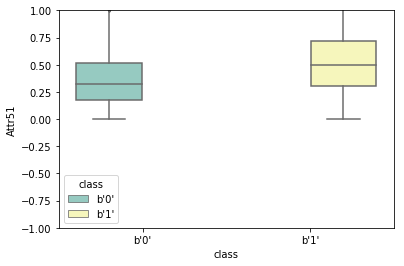

In [111]:
ax = sns.boxplot(x="class", y="Attr51", hue="class",data=df_new, palette="Set3")
plt.ylim([-1,1])

(-1, 1)

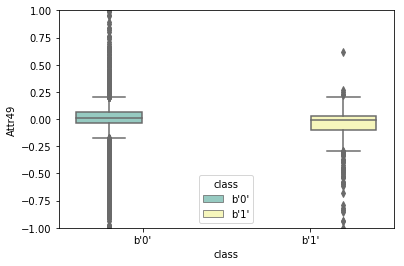

In [110]:
ax = sns.boxplot(x="class", y="Attr49", hue="class",data=df_new, palette="Set3")
plt.ylim([-1,1])

(-2, 2)

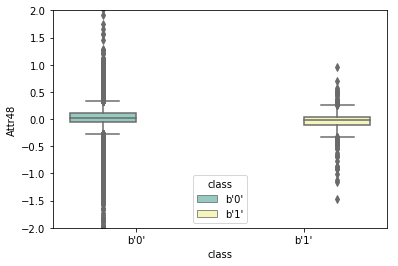

In [109]:
ax = sns.boxplot(x="class", y="Attr48", hue="class",data=df_new, palette="Set3")
plt.ylim([-2,2])

(-10, 10)

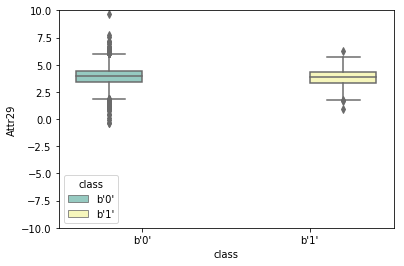

In [108]:
ax = sns.boxplot(x="class", y="Attr29", hue="class",data=df_new, palette="Set3")
plt.ylim([-10,10])

(-2, 2)

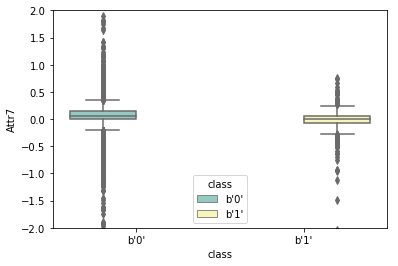

In [106]:
ax = sns.boxplot(x="class", y="Attr7", hue="class",data=df_new, palette="Set3")
plt.ylim([-2,2])

(-8, 8)

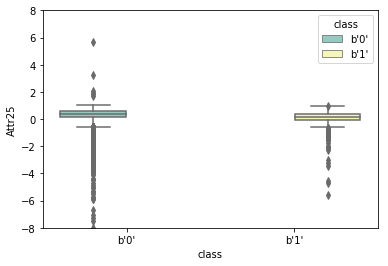

In [104]:
ax = sns.boxplot(x="class", y="Attr25", hue="class",data=df_new, palette="Set3")
plt.ylim([-8,8])

(-10, 10)

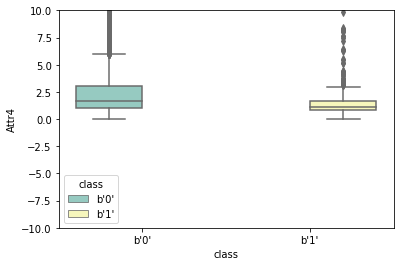

In [102]:
ax = sns.boxplot(x="class", y="Attr4", hue="class",data=df_new, palette="Set3")
plt.ylim([-10,10])

(-8, 8)

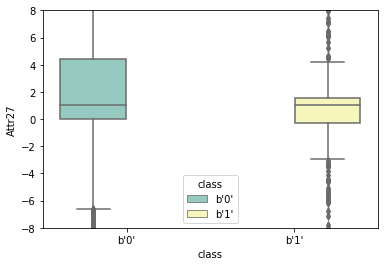

In [100]:
ax = sns.boxplot(x="class", y="Attr27", hue="class",data=df_new, palette="Set3")
plt.ylim([-8,8])

(-2, 2)

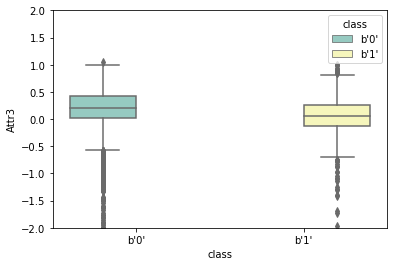

In [144]:
ax = sns.boxplot(x="class", y="Attr3", hue="class",data=df_new, palette="Set3")
plt.ylim([-2,2])

(-2, 2)

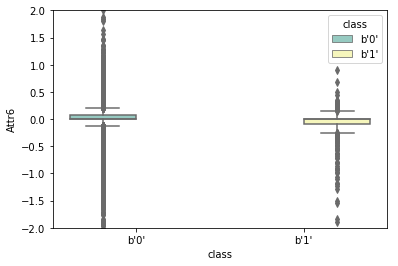

In [146]:
ax = sns.boxplot(x="class", y="Attr6", hue="class",data=df_new, palette="Set3")
plt.ylim([-2,2])

(-5, 5)

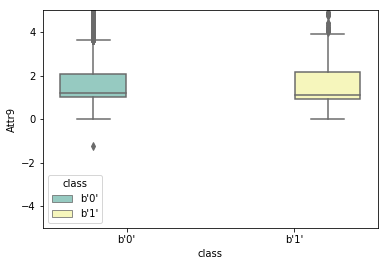

In [148]:
ax = sns.boxplot(x="class", y="Attr9", hue="class",data=df_new, palette="Set3")
plt.ylim([-5,5])

In [36]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

9321/9321 [==============================] - 0s 21us/step


[0.34502863763113056, 0.8417551764896046]

In [39]:
y_pred = classifier.predict(X_test)


In [43]:
y__test = y_test.astype(int)

In [44]:
y__pred = (y_pred>0.5)
ypred = y__pred.astype(int)

In [68]:
ypred = np.array(ypred)

In [46]:
y__test

array([0, 1, 1, ..., 0, 0, 1])

In [47]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y__test, ypred)
print(cm1)

[[1554  449]
 [ 195 1797]]


In [48]:
accuracy = (cm1[0][0]+cm1[1][1])/(cm1[0][0]+cm1[0][1]+cm1[1][0]+cm1[1][1])
print("Accuracy is: "+ str(accuracy*100)+"%")

Accuracy: 83.87984981226533%


In [29]:
#from sklearn.model_selection import StratifiedShuffleSplit
#sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)

# Random forest classification using scikit-learn

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                              random_state=0)
clf.fit(X_train_new, y_train_new)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [87]:
X_train_new1 = pd.DataFrame(X_train_new)

In [91]:
feature_imp = pd.DataFrame(clf.feature_importances_,
                                   index = X_train_new1.columns,
                                    columns=['importance%']).sort_values('importance%',ascending=False)
feature_imp

,importance%
5,0.160877
12,0.157090
8,0.150929
7,0.115746
0,0.078643
1,0.074035
3,0.064579
4,0.051125
15,0.037427
14,0.032552


In [70]:
print(clf.predict(X_test_new))

['1' '1' '0' ... '1' '0' '1']


In [ ]:
print(clf.predict(X_test_new))

In [116]:
print(clf.score(X_test_new,y_test_new))

0.7181315742556605


In [76]:
print(clf.n_classes_)

2


In [93]:
from sklearn.metrics import accuracy_score
score_train_RF = []
score_test_RF = []
factor = []
for i in range(4,30,4):
    clf_rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
    clf_rf = clf_rf.fit(X_train_new, y_train_new)
    y_pred_rf = clf_rf.predict(X_test_new)
    factor.append(i)
    score_train_RF.append(accuracy_score(y_train_new,clf_rf.predict(X_train_new)))
    score_test_RF.append(accuracy_score(y_test_new,clf_rf.predict(X_test_new)))


In [94]:
df_RF = pd.DataFrame()
df_RF['Training_accuracy'] = score_train_RF
df_RF['Test_accuracy'] = score_test_RF
df_RF['K'] =factor

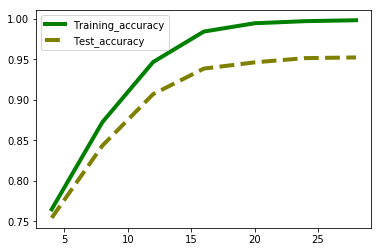

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot( 'K', 'Training_accuracy', data=df_RF , markerfacecolor='blue', markersize=6, color='green', linewidth=4)
plt.plot( 'K', 'Test_accuracy', data=df_RF, marker='', color='olive', linewidth=4, linestyle='dashed')
plt.legend()

In [120]:
y_t_int = y_test_new.astype(np.int)

In [121]:
y_p_int = y_pred_rf.astype(np.int)

In [ ]:
##AUROC curve

In [122]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_t_int, y_p_int)

In [123]:
metrics.auc(fpr, tpr)

0.9703455592657777

In [109]:
y_pred_rf

array(['0', '1', '1', ..., '1', '0', '1'], dtype=object)

In [124]:
import numpy as np
from sklearn.metrics import roc_auc_score
roc_auc_score(y_t_int, y_p_int)

0.9703455592657777

In [ ]:
F1 = 2 * (precision * recall) / (precision + recall)

In [125]:
from sklearn.metrics import f1_score

In [126]:
f1_score(y_t_int, y_p_int, average='weighted')  

0.970401347646103

In [149]:
X_res.shape

(18696, 63)

# Hyperparameter tuning using Grid Search method

In [140]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini','entropy'],
            'max_depth':[1,2,3,4,5], 'max_features':['auto'], 'max_leaf_nodes':[2,3,4]}
grid_search = GridSearchCV(estimator = clf_rf, param_grid = parameters, cv = 10, n_jobs = -1,return_train_score=True)
grid_search = grid_search.fit(X_train, y_train)
best_param = grid_search.best_params_

In [141]:
best_param

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': 4}

# Boosting techniques

In [127]:
from sklearn.ensemble import AdaBoostClassifier

In [129]:
score_train_ada = []
score_test_ada = []
factor = []
for i in range(1,5,1):
    clf_ada = AdaBoostClassifier(n_estimators=10, base_estimator=clf_rf,learning_rate=i)
    clf_ada = clf_ada.fit(X_train, y_train_new)
    y_pred_ada = clf_ada.predict(X_test_new)
    factor.append(i)
    score_train_ada.append(accuracy_score(y_train_new,clf_ada.predict(X_train_new)))
    score_test_ada.append(accuracy_score(y_test_new,clf_ada.predict(X_test_new)))


In [130]:
print(clf_ada.score(X_test_new,y_test_new))

0.9812800855767516


In [131]:
df_ada = pd.DataFrame()
df_ada['Training_accuracy'] = score_train_ada
df_ada['Test_accuracy'] = score_test_ada
df_ada['K'] =factor

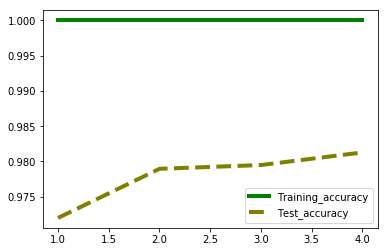

In [132]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot( 'K', 'Training_accuracy', data=df_ada , markerfacecolor='blue', markersize=6, color='green', linewidth=4)
plt.plot( 'K', 'Test_accuracy', data=df_ada, marker='', color='olive', linewidth=4, linestyle='dashed')
plt.legend()

# Gradient Boosting method

In [138]:
from sklearn.ensemble import GradientBoostingClassifier #For Classification

In [139]:
clf_gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
clf_gbm.fit(X_train_new, y_train_new)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [165]:
##Bagging classifier
from sklearn.ensemble import BaggingClassifier #For Classification
score_train_bag = []
score_test_bag = []
factor = []
for i in range(10,100,10):
    clf_bag = BaggingClassifier(n_estimators=i, max_samples=1.0, max_features=1.0)
    clf_bag.fit(X_train_new, y_train_new)
    y_pred_bag = clf_bag.predict(X_test_new)
    factor.append(i)
    score_train_bag.append(accuracy_score(y_train_new,clf_bag.predict(X_train_new)))
    score_test_bag.append(accuracy_score(y_test_new,clf_bag.predict(X_test_new)))


In [185]:
df_bag = pd.DataFrame()
df_bag['Training_accuracy'] = score_train_bag
df_bag['Test_accuracy'] = score_test_bag
df_bag['K'] =factor

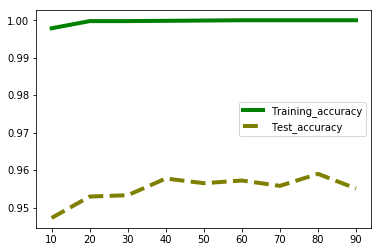

In [186]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot( 'K', 'Training_accuracy', data=df_bag , markerfacecolor='blue', markersize=6, color='green', linewidth=4)
plt.plot( 'K', 'Test_accuracy', data=df_bag, marker='', color='olive', linewidth=4, linestyle='dashed')
plt.legend()

# Decision Tree Classifier 

In [91]:
#Decision Tree classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
score_train_DT = []
score_test_DT = []
factor = []
for i in range(4,30,4):
    clf_dt1 = DecisionTreeClassifier(criterion = "gini", splitter="best", max_depth=i)
    clf_dt1 = clf_dt1.fit(X_train_new,y_train_new)
    y_pred_DT = clf_dt1.predict(X_test_new)
    factor.append(i)
    score_train_DT.append(accuracy_score(y_train_new,clf_dt1.predict(X_train_new)))
    score_test_DT.append(accuracy_score(y_test_new,y_pred_DT))


In [92]:
print(clf_dt1.score(X_test_new,y_test_new))

0.9386733416770964


In [93]:
df_DT = pd.DataFrame()
df_DT['Training_accuracy'] = score_train_DT
df_DT['Test_accuracy'] = score_test_DT
df_DT['K'] =factor

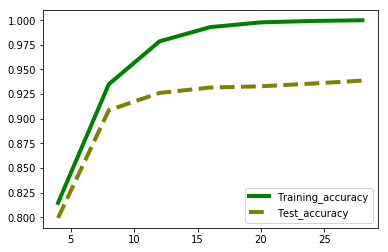

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot( 'K', 'Training_accuracy', data=df_DT , markerfacecolor='blue', markersize=6, color='green', linewidth=4)
plt.plot( 'K', 'Test_accuracy', data=df_DT, marker='', color='olive', linewidth=4, linestyle='dashed')
plt.legend()

# Naive Bayes Classifier

In [95]:
from sklearn.naive_bayes import GaussianNB
score_train_NB = []
score_test_NB = []
factor = []
for i in range(20):
    clf = GaussianNB(var_smoothing = i)
    clf.fit(X_train_new,y_train_new)
    y_pred_NB = clf.predict(X_test_new)
    factor.append(i)
    score_train_NB.append(accuracy_score(y_train_new,clf.predict(X_train_new)))
    score_test_NB.append(accuracy_score(y_test_new,y_pred_NB))
        

In [96]:
print(clf.score(X_test,y_test))

0.5008760951188986


In [97]:
df_NB = pd.DataFrame()
df_NB['Training_accuracy'] = score_train_NB
df_NB['Test_accuracy'] = score_test_NB
df_NB['K'] =factor

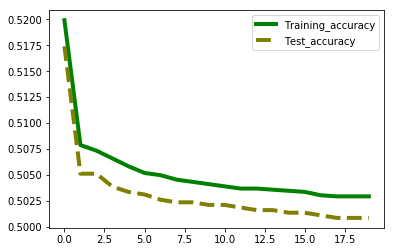

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot( 'K', 'Training_accuracy', data=df_NB , markerfacecolor='blue', markersize=6, color='green', linewidth=4)
plt.plot( 'K', 'Test_accuracy', data=df_NB, marker='', color='olive', linewidth=4, linestyle='dashed')
plt.legend()

# KNN classifier

In [99]:
# Create and fit a nearest-neighbor classifier on D1 dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
score_train_KN = []
score_test_KN = []
factor = []

for i in range(1,18,2):
    knn = KNeighborsClassifier(algorithm='auto', 
                     leaf_size=30, 
                     metric='minkowski',
                     metric_params=None, 
                     n_jobs=1, 
                     n_neighbors=i, 
                     p=2,
                     weights='uniform')
    knn.fit(X_train_new,np.ravel(y_train_new))
    factor.append(i)
    score_train_KN.append(accuracy_score(np.ravel(y_train_new),knn.predict(X_train_new)))
    score_test_KN.append(accuracy_score(y_test_new,knn.predict(X_test_new)))


In [100]:
print(knn.score(X_test,y_test))

0.8142678347934919


In [101]:
df_knn_d1 = pd.DataFrame()
df_knn_d1['Training_accuracy'] = score_train_KN
df_knn_d1['Test_accuracy'] = score_test_KN
df_knn_d1['K'] =factor

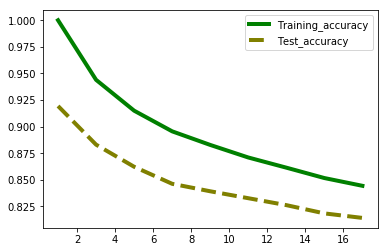

In [102]:
plt.plot( 'K', 'Training_accuracy', data=df_knn_d1 , markerfacecolor='blue', markersize=6, color='green', linewidth=4)
plt.plot( 'K', 'Test_accuracy', data=df_knn_d1, marker='', color='olive', linewidth=4, linestyle='dashed')
plt.legend()

In [163]:
y_i_tr = y_train.astype(int)

In [164]:
y_i_te = y_test.astype(int)

# SVM

In [ ]:
print(clf_dt.score(X_test,y_test))